<a href="https://colab.research.google.com/github/holoverse/chat-langchain/blob/master/the_holoverse_entrapment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define dimensions of the state space
DIMENSIONS = 2  # For visualization purposes
STATE_SPACE_SIZE = 100  # Number of possible states in each dimension

# Create a grid representing the state space
state_space = np.zeros((STATE_SPACE_SIZE, STATE_SPACE_SIZE))

In [ ]:
def is_within_entropic_border(position):
    center = np.array([STATE_SPACE_SIZE // 2, STATE_SPACE_SIZE // 2])
    radius = STATE_SPACE_SIZE // 2 * 0.9  # 90% of the maximum radius
    distance = np.linalg.norm(position - center)
    return distance <= radius

In [ ]:
class Consciousness:
    def __init__(self, position):
        self.position = np.array(position)
        self.path = [self.position.copy()]

    def move(self):
        # Possible moves: up, down, left, right, or stay
        moves = [
            np.array([0, 1]),   # Up
            np.array([0, -1]),  # Down
            np.array([1, 0]),   # Right
            np.array([-1, 0]),  # Left
            np.array([0, 0])    # Stay
        ]
        np.random.shuffle(moves)
        for move in moves:
            new_position = self.position + move
            if self.is_valid_position(new_position):
                self.position = new_position
                self.path.append(self.position.copy())
                break  # Move made
        else:
            # No valid moves; consciousness is trapped
            pass

    def is_valid_position(self, position):
        # Check boundaries
        if np.any(position < 0) or np.any(position >= STATE_SPACE_SIZE):
            return False
        # Check entropic border
        if not is_within_entropic_border(position):
            return False
        return True


In [ ]:
# Initialize consciousness at the center
initial_position = np.array([STATE_SPACE_SIZE // 2, STATE_SPACE_SIZE // 2])
consciousness = Consciousness(initial_position)

# Simulate movement
NUM_STEPS = 1000
for _ in range(NUM_STEPS):
    consciousness.move()


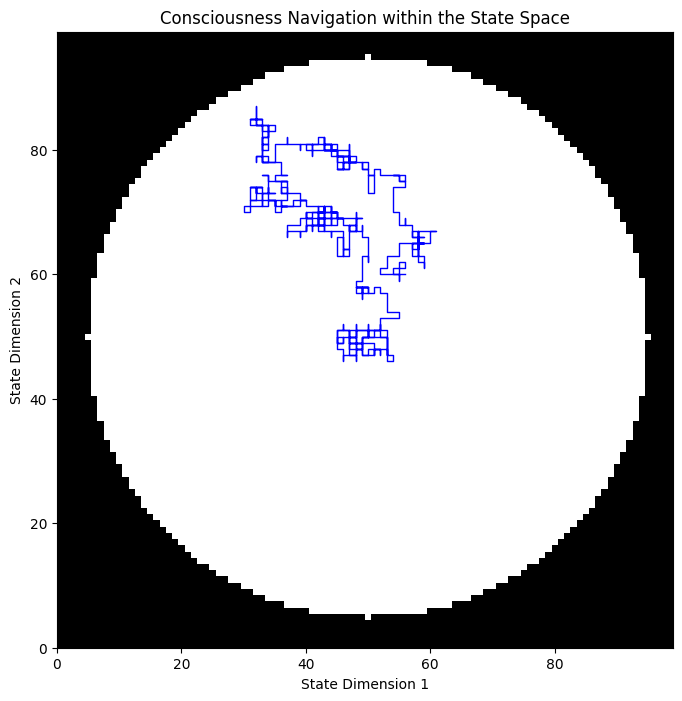

In [ ]:
# Create a meshgrid for visualization
x = np.arange(0, STATE_SPACE_SIZE)
y = np.arange(0, STATE_SPACE_SIZE)
X, Y = np.meshgrid(x, y)

# Calculate entropic border
center = np.array([STATE_SPACE_SIZE // 2, STATE_SPACE_SIZE // 2])
radius = STATE_SPACE_SIZE // 2 * 0.9
distance = np.sqrt((X - center[0])**2 + (Y - center[1])**2)
border = distance <= radius

# Plot the entropic border
plt.figure(figsize=(8, 8))
plt.imshow(border, cmap='gray', origin='lower')

# Plot the path of consciousness
path = np.array(consciousness.path)
plt.plot(path[:, 0], path[:, 1], color='blue', linewidth=1)

plt.title('Consciousness Navigation within the State Space')
plt.xlabel('State Dimension 1')
plt.ylabel('State Dimension 2')
plt.xlim(0, STATE_SPACE_SIZE - 1)
plt.ylim(0, STATE_SPACE_SIZE - 1)
plt.show()
